# 類神經網路

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
print(digits.data)
digits.data().type

NameError: name 'digits' is not defined

In [3]:
cc=digits.data[1]
print(type(cc))
cc.shape

<class 'numpy.ndarray'>


(64,)

Populating the interactive namespace from numpy and matplotlib


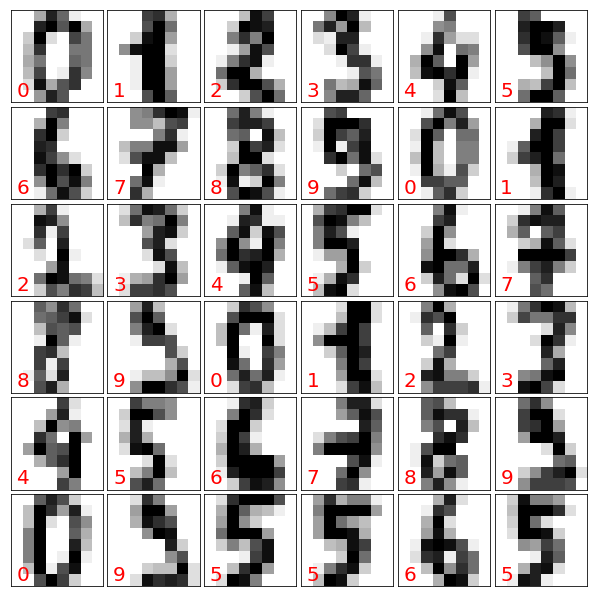

In [4]:
%pylab inline
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)
for i in range(36):
    ax=fig.add_subplot(6,6,i+1,xticks=[],yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0,7,str(digits.target[i]),color="red",fontsize=20)

## 規ㄧ化

In [5]:
#Methed 1
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#scaler.fit(digits.data)
#X_scaled=scaler.transform(digits.data)
#X_scaled[1]

In [6]:
#Methed 2 
from sklearn import preprocessing
import numpy as np
X_train = digits.data
X_scaled = preprocessing.scale(X_train)
print(X_scaled[1])                                   
X_scaled.shape

[ 0.         -0.33501649 -1.09493684  0.03864775  0.26875116 -0.13801953
 -0.40972392 -0.12502292 -0.05907756 -0.62400926 -1.91557297 -0.24630352
  1.19644995  0.13619465 -0.51499146 -0.13043338 -0.04462507 -0.72764628
 -1.2133854   1.38030848  1.44186017 -0.29155283 -0.54880546 -0.11422184
 -0.03337973  1.44018517  0.95451315  1.22058589  0.98740215 -0.94558832
 -0.62889588 -0.04723238  0.         -0.67237227 -1.05445197  1.10556952
  0.96064411 -0.97870236 -0.82269451  0.         -0.06134367 -0.5312841
 -0.89983895  1.36217503  1.33078862 -0.39278683 -0.79827225 -0.08874162
 -0.03543326 -0.40357499 -1.15311752  1.23639392  1.24208282 -0.45750018
 -0.75743581 -0.20978513 -0.02359646 -0.29908135 -1.08938309 -0.24900951
  0.84963214  0.54856067 -0.5056698  -0.19600752]


(1797, 64)

In [7]:
#train
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(30,30,30),activation='logistic',max_iter=1000)
mlp.fit(X_scaled,digits.target)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [8]:
predicted = mlp.predict(X_scaled)

Populating the interactive namespace from numpy and matplotlib


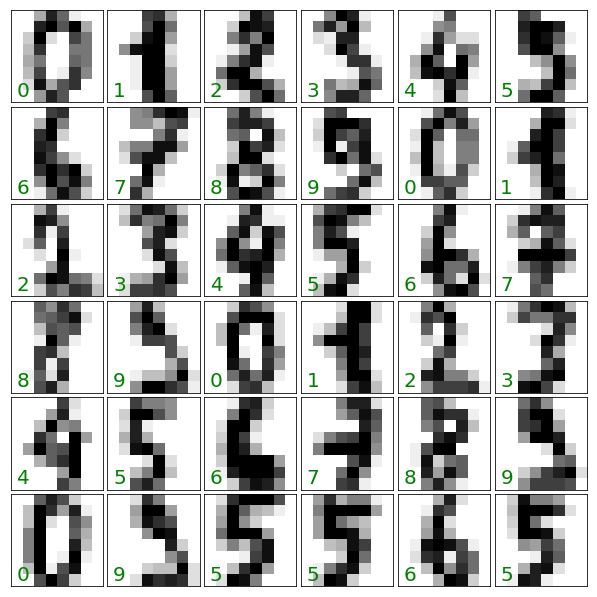

In [9]:
%pylab inline
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)
for i in range(36):
    ax=fig.add_subplot(6,6,i+1,xticks=[],yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0,7,str(predicted[i]),color="green",fontsize=20)

In [10]:
sum(predicted == digits.target) /len(digits.target)

1.0

## 輸入欲比對的值

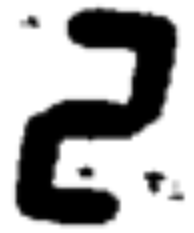

In [11]:
from PIL import Image

img = Image.open( 'D:/testyee.png' )
img


(8, 8)


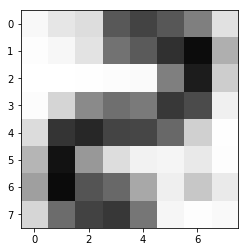

In [12]:
nim = img.resize( (8, 8), Image.BILINEAR )
print (nim.size)
import matplotlib.pyplot as plt_test
plt_test = nim
imshow(plt_test)
#不能是三維的RGB矩陣輸入

In [13]:
#nim = img.resize( (8, 8), Image.BILINEAR )
img2 = nim.rotate(0).convert("L")
import numpy as np
imgarr = np.array(img2).reshape(64,1)
img3=imgarr.flatten()

B = np.reshape(img3, (-1, 64))

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
#scaler.transform(imgarr.flatten('F'))  
X_test=B
X_test_normalize= scaler.transform(X_test)  

predicted2 = mlp.predict(X_test_normalize)
print(predicted2)

[4]


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
